In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv("economic_index.csv")

In [5]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [9]:
df.drop(columns=['Unnamed: 0','year','month'],axis=1,inplace=True)

In [11]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [17]:
# check null values
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [19]:
## lets do some visualization
import seaborn as sns

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


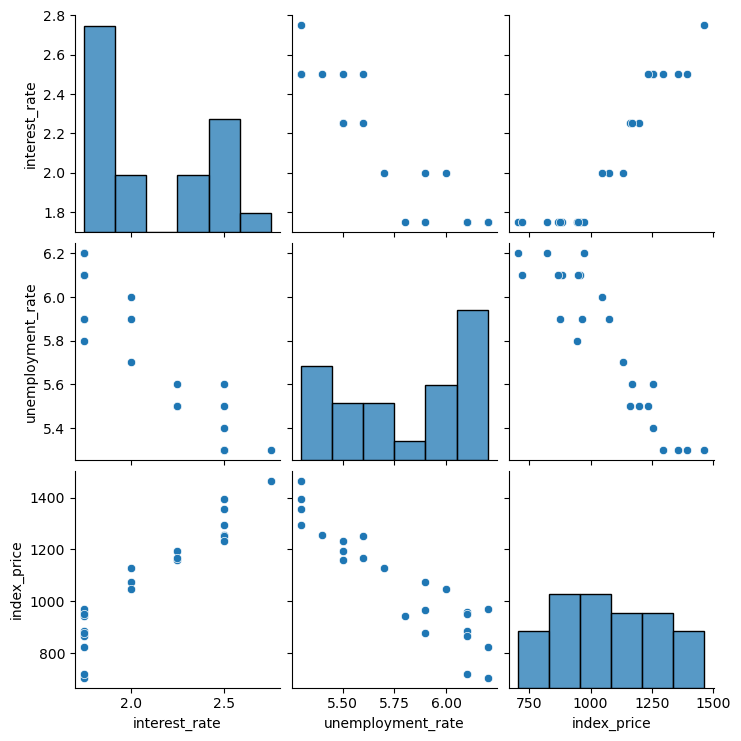

In [21]:
sns.pairplot(df)

In [23]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment_rate')

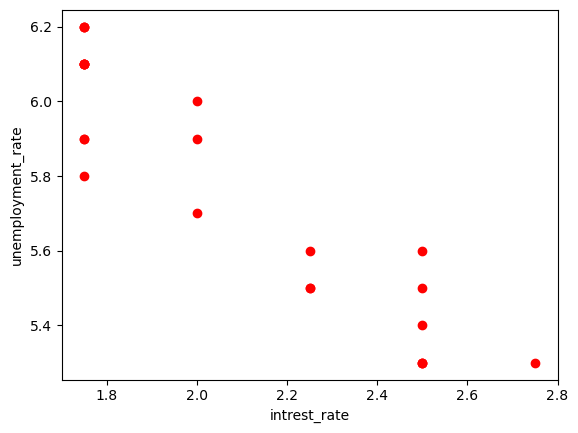

In [32]:
## Visualize data points more cleary
plt.scatter(df['interest_rate'],df['unemployment_rate'],color='r')
plt.xlabel("intrest_rate")
plt.ylabel("unemployment_rate")

In [34]:
# independent and dependent feature
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [36]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [38]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [44]:
## train test split
from sklearn.model_selection import train_test_split 

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

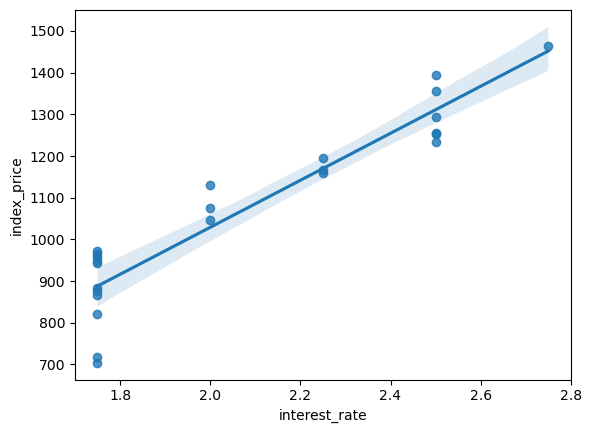

In [54]:
## seaborn 
import seaborn as sns
sns.regplot(x=df['interest_rate'],y=df['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

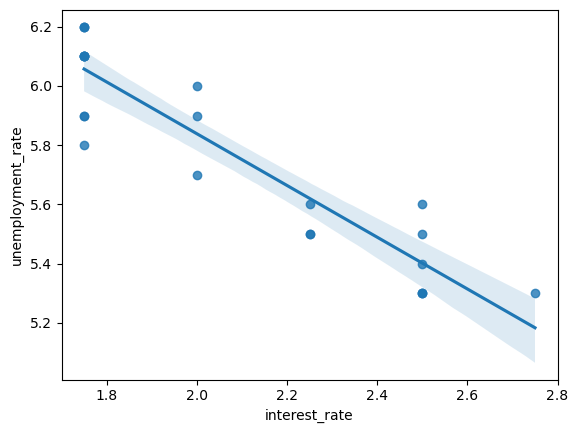

In [56]:
sns.regplot(x=df['interest_rate'],y=df['unemployment_rate'])

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

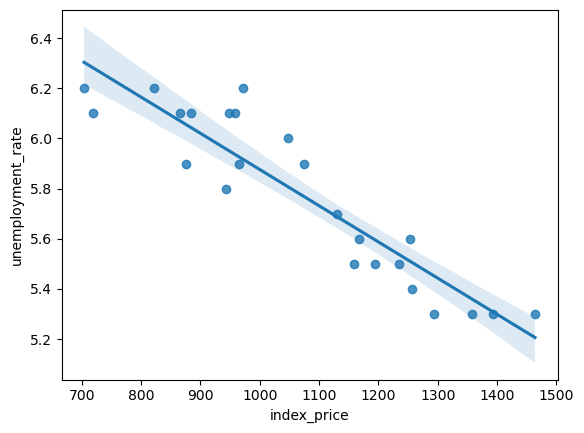

In [60]:
sns.regplot(x=df['index_price'],y=df['unemployment_rate'])

In [62]:
from sklearn.preprocessing import StandardScaler

In [64]:
scaler = StandardScaler()

In [66]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [68]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [70]:
from sklearn.linear_model import LinearRegression

In [74]:
regression = LinearRegression()

In [76]:
regression.fit(X_train,y_train)

LinearRegression()

In [78]:
# cross validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [82]:
np.mean(validation_score)

-5914.8281801623925

In [84]:
## prediction
y_pred = regression.predict(X_test)

In [86]:
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [88]:
## Performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rms = np.sqrt(mse)
print("mse :", mse)
print("mae :", mae)
print("rms :", rms)

mse : 8108.567426306604
mae : 73.80444932337097
rms : 90.04758423359621


In [98]:
## Rsquare
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print(score)
# adjusted r2
print(1 - (1-score)*(len(y_test)-1)/(len(y_test) - X_test.shape[1] - 1))

0.7591371539010257
0.5985619231683761


In [90]:
## Assumptions

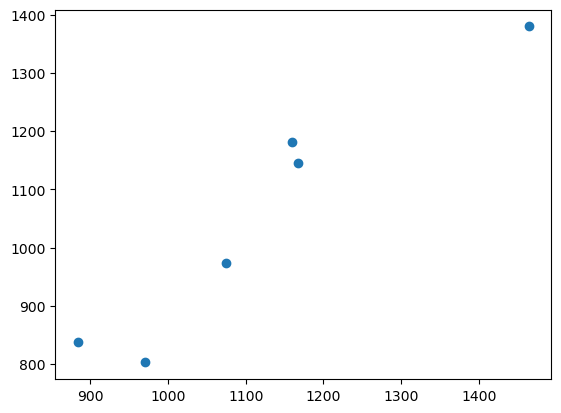

In [100]:
plt.scatter(y_test,y_pred)

In [102]:
residuals = y_test - y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


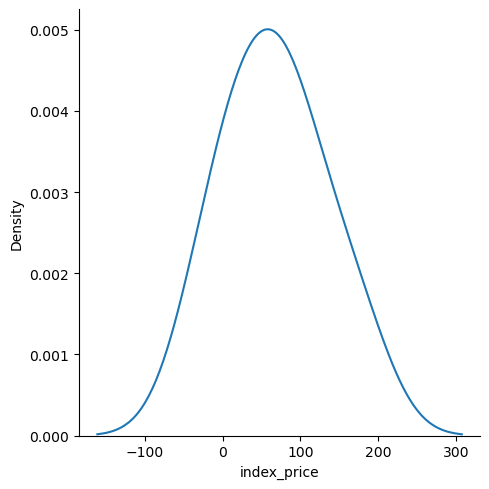

In [106]:
sns.displot(residuals, kind='kde')

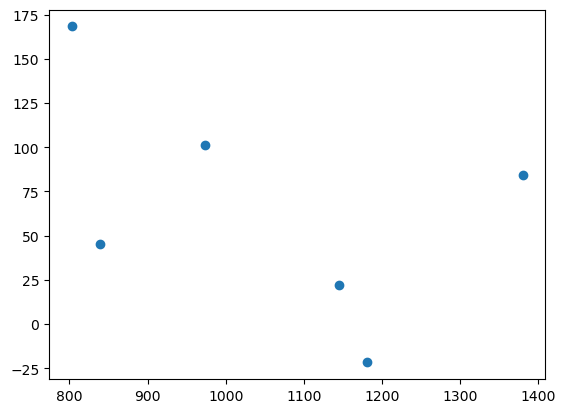

In [108]:
plt.scatter(y_pred,residuals)